<a href="https://colab.research.google.com/github/pankajmanisahu/Unsupervised-Netflix-Movies-And-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -**           Pankaj Mani Sahu

# **Project Summary -**

### Netflix is a popular streaming service that provides its subscribers with a wide range of movies, TV shows, documentaries, and original content to watch on demand. The company was founded in 1997 as a DVD rental service but later pivoted to an online streaming model in 2007. Since then, Netflix has grown into one of the most popular streaming services globally, with over 200 million subscribers in more than 190 countries as of 2021.

### Netflix's success is due in part to its innovative business model and emphasis on creating original content. The company invests heavily in producing its own movies and TV shows, which have won numerous awards and attracted high-profile talent. Netflix also uses sophisticated algorithms to recommend content to its users, based on their viewing history and preferences.

### This project aimed to identify patterns in the content available on the platform and group them into clusters based on similarities in their genres, sub-genres, release year, and other features. The project utilized machine learning algorithms such as K-means clustering and Hierarchical Clustering to cluster the data.

# **GitHub Link -**

https://github.com/pankajmanisahu/Unsupervised-Netflix-Movies-And-TV-Shows-Clustering

# **Problem Statement**

### This dataset contains tv shows and movies available on Netflix as of 2019. The data is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of tv shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2000 titles since 2010, while its number of tv shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

### In this project, i'm going to do
* Exploratory Data Analysis
* Understanding what types of content are available in different countries.
* If Netflix has been increasingly focusing on TV rather than movies in recent years.
* Clustering similar content by matching text-based features.

# ***Let's Begin !***

### Importing libraries

In [53]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import datetime as dt

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from  sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [54]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Unsupervised Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [56]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [57]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [58]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [59]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [60]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [61]:
# total null values presnt in the data
data.isnull().sum().sum()

3631

<Axes: >

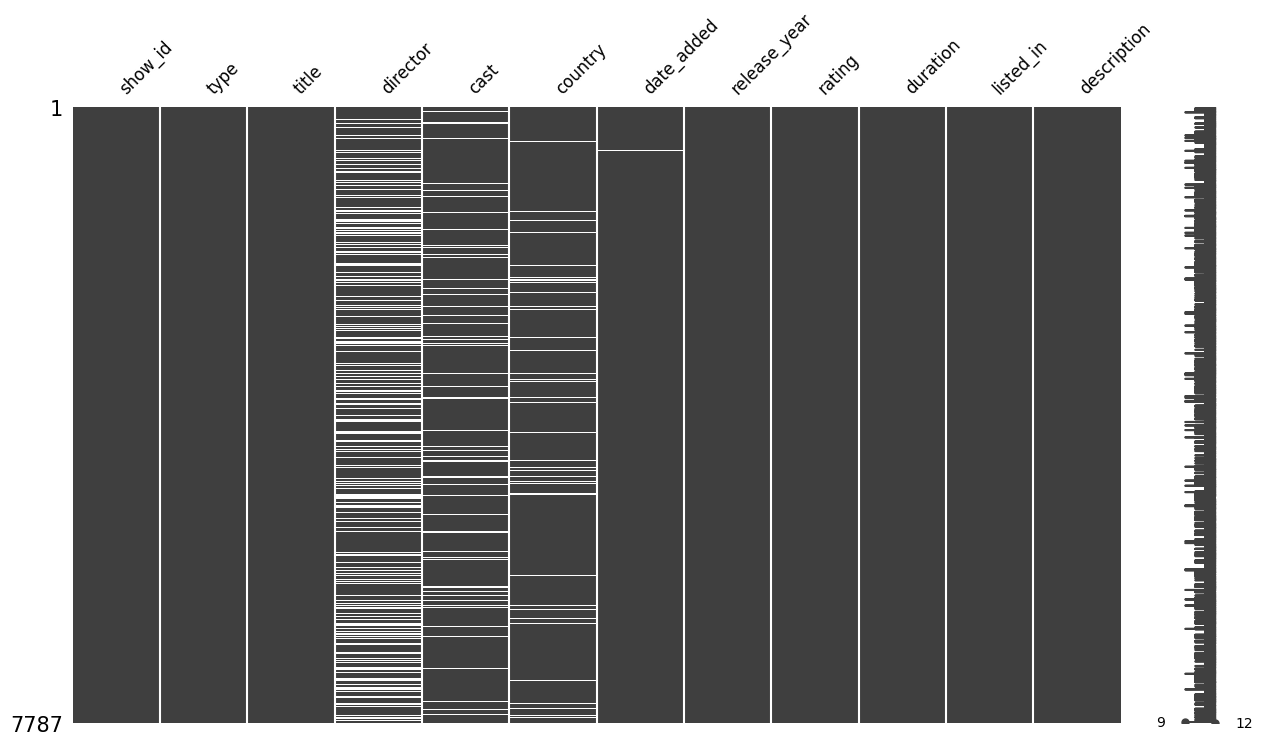

In [62]:
# Visualizing the missing values
msno.matrix(data, figsize = (15,8), fontsize =(12))

### This dataset contains 7787 observations with 12 features. It has some null values present in director, cast, country, date_added, and rating.

## ***Understanding Variables***

In [63]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [64]:
# Dataset Describe
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [65]:
# description of all the features.
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

**show_id :-** Unique id for every movies/Tv shows

**type :-** Identifier - A movie or Tv show

**title :-** Title of the movie/show

**director :-** Director of the show

**cast :-** Actors involved in the show

**Country :-** Country of production

**date_added :-** Date is what added on netflix

**release_year :-** Actual release year of the show

**rating :-** TV rating of the show

**duration :-** Total duration in minutes or number of seasons.

**listed_in :-** Genre

**Description :-** The summary description

### Check Unique Values for each variable.

In [66]:
# Check Unique Values for each variable.
variables_data = data.columns.to_list()
for item in variables_data:
  print('The Unique Values of', item, 'are:', data[item].unique())

The Unique Values of show_id are: ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
The Unique Values of type are: ['TV Show' 'Movie']
The Unique Values of title are: ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
The Unique Values of director are: [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
The Unique Values of cast are: ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
The Unique Va

##  ***Data Wrangling***

In [67]:
# copy of the data.
df = data.copy()

In [68]:
# handling null values.
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [69]:
# filling the null values of director and cast.
df.fillna({'director':'name absent', 'cast':'name missing'}, inplace = True)

# filling the null values of rating and country with their mode.
df['country'].fillna(df ['country'].mode()[0], inplace = True)
df['rating'].fillna(df ['rating'].mode()[0], inplace = True)

# droping the observation with null values present in date added.
df = df[df['date_added'].notna()]

In [70]:
# checking the null value counts again.
df.isnull().sum().sum()

0

In [71]:
# checking the data type of data.
df.date_added.dtype

dtype('O')

In [72]:
# converting date_added column to date time and extracting the day, month and year from the column.
df['date_added'] = pd.to_datetime(df['date_added'])

# extracting day, month and year.
df['added_day'] = df['date_added'].dt.day

df['added_month'] = df['date_added'].dt.month

df['added_year'] = df['date_added'].dt.year

In [73]:
# columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_day', 'added_month', 'added_year'],
      dtype='object')

### Understanding the rating value.

In [74]:
# rating value counts.
df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [75]:
# converting rating into understandable format.

rename_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['rating'] =df['rating'].replace(to_replace = rename_rating)
df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

### For more information about netflix rating [click here](https://decider.com/2018/04/23/surprising-facts-about-netflixs-ratings/).

### What all manipulations have you done and insights you found?

* ### Made a copy of the original dataset as df.


* ### Checked the null value counts of each column.


* ### Handled the null values by filling in different values based on the column values. Like, the country and rating column has been filled by its mode. The director and cast are filled by name absent and name missing. Apart from that data_added had also some null values so I picked the data where the nan value of date_added was not present and assigned them to df.


* ### After filling in the null values checked the null value counts again and got 0.

* ### Checked the data type of date_added column and converted it into DateTime. Then I extracted the day, month, and year from it. I assigned that value to a new variable like added_day, added_month, and added_year.

* ### Converted the rating into an understandable format.

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Shows type counts.**

<Axes: xlabel='type', ylabel='count'>

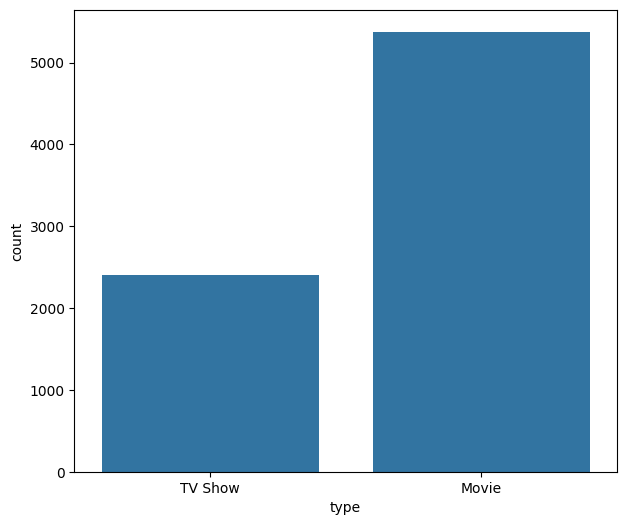

In [76]:
from matplotlib import figure
# type counts.
plt.figure(figsize = (7,6))
sns.countplot(x = 'type', data = df)

### I picked a count plot here to see the total counts of each show.

### We can clearly see in the count plot here that most of the content added is movies which are approximately 5000. Nearly 2500 contents are TV Shows.

### **Top ten countries based on total production.**

<Axes: xlabel='Country Name', ylabel='Total number of production'>

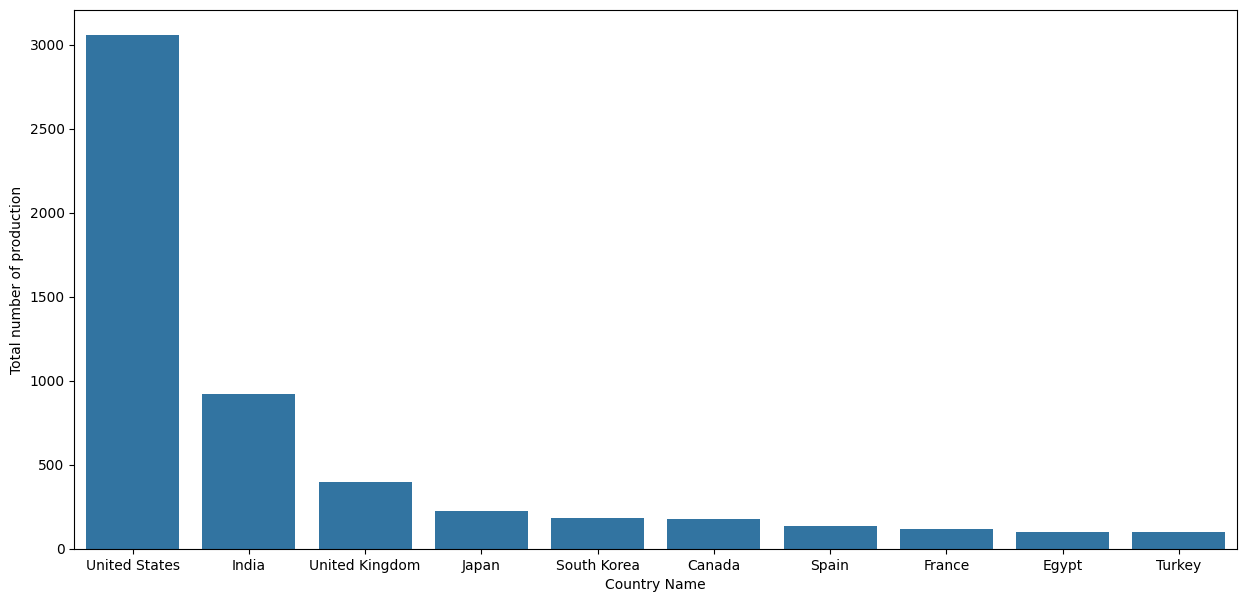

In [77]:
# top ten countries based on number of tv shows and moviews production.
top_countries = df['country'].value_counts().sort_values(ascending = False).reset_index().head(10)
top_countries.rename(columns = {'index':'Country Name', 'country':'Total number of production'}, inplace = True)
plt.figure(figsize = (15,7))
sns.barplot(data = top_countries, x = 'Country Name', y = 'Total number of production')

### I wanted to see the top ten countries based on the total production so, I picked a barplot here. Barplot is very useful to see the data through bars with its values.

### According to the graph a huge number of contents are produced in the United States followed by India, UK, and Japan. Whereas Spain, France, Egypt, and Turkey have a very less number of production.

### **Totlal number of contents wrt  added_year, added_month, added_day, release_year, rating, type.**

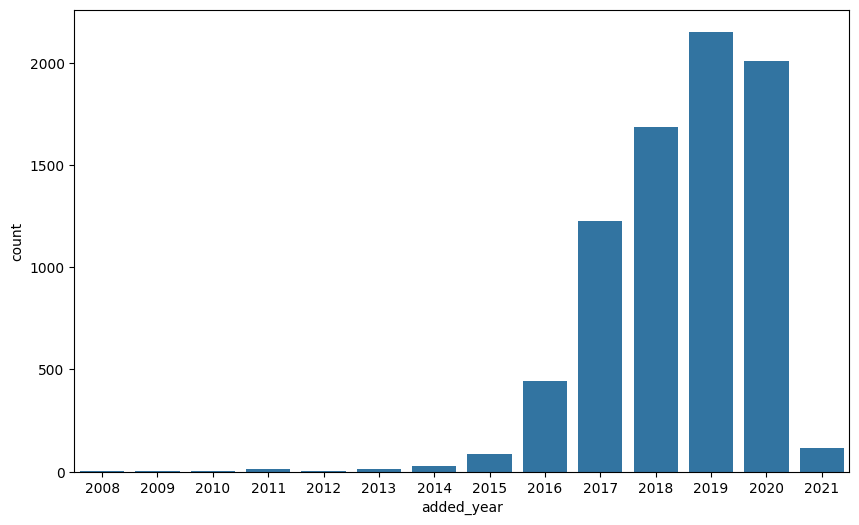

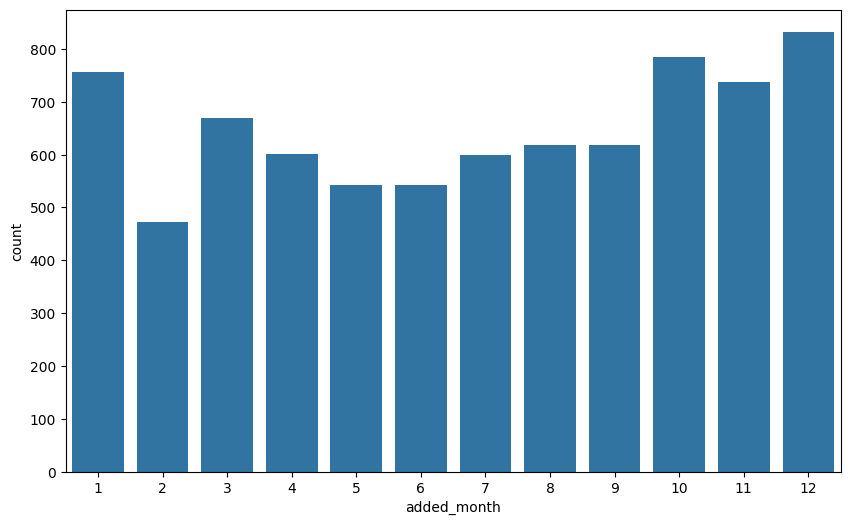

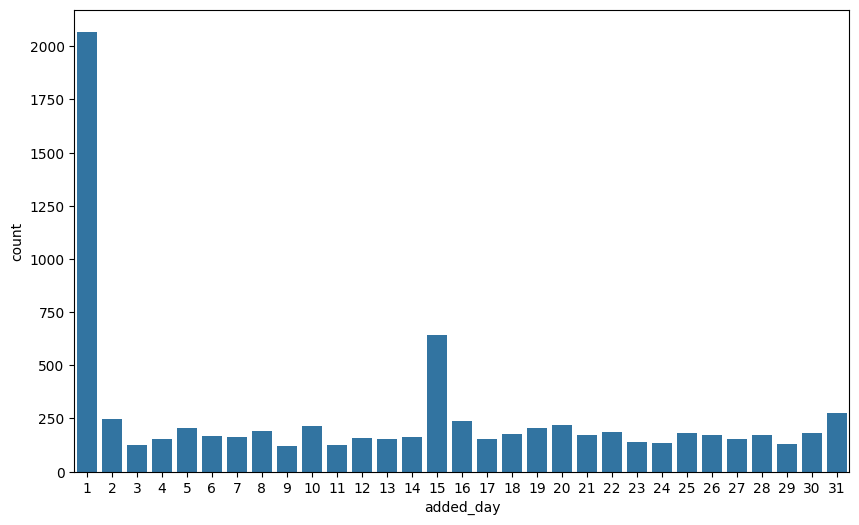

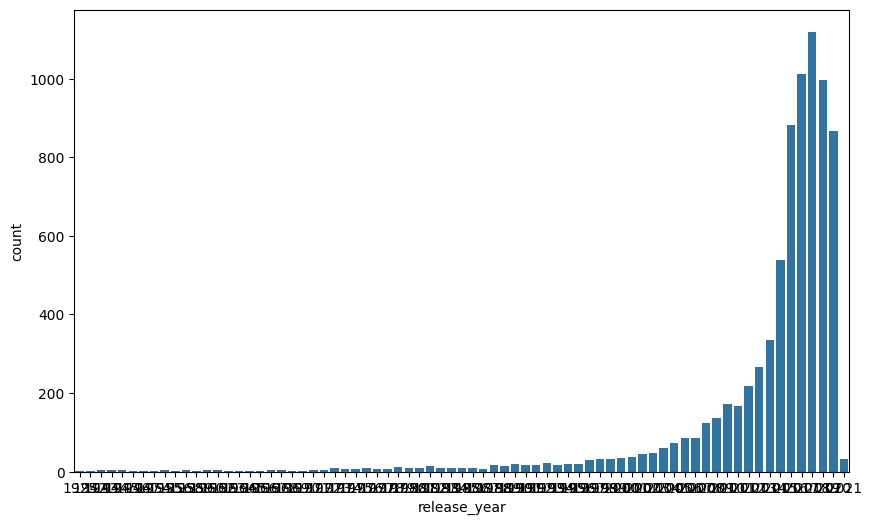

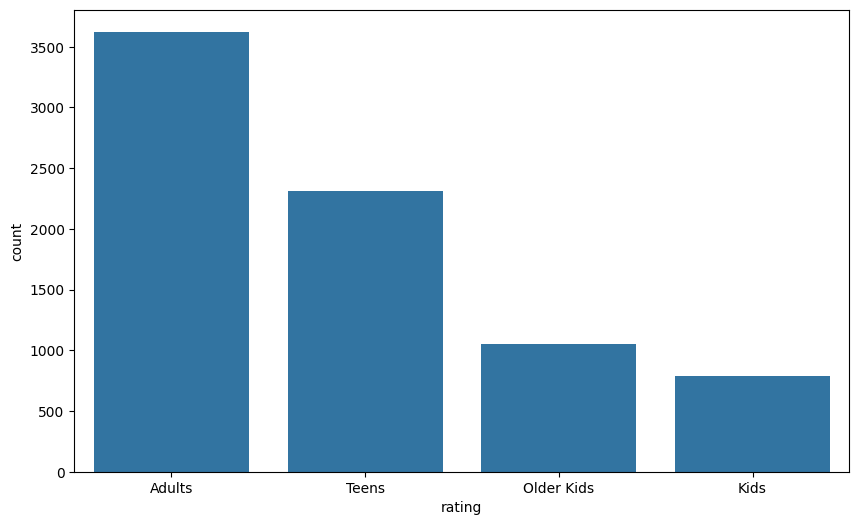

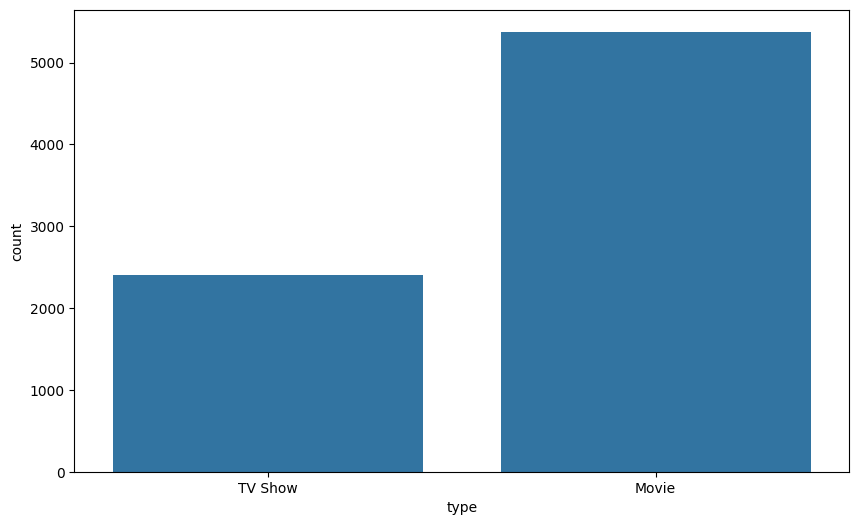

In [78]:
# visualizing the.
var = ['added_year', 'added_month', 'added_day', 'release_year', 'rating', 'type']

# years with total contents added.
for col in var:
  plt.figure(figsize = (10,6))
  sns.countplot(x = col, data = df)

* ### **added_year :-** Most of the content on Netflix is added in 2018, 2019, and 2020. In which 2019 the maximum number of contents are added. this was the time when Netflix became prevalent among people. Very few contents are added in 2021 because of the pandemic.

* ### **added_month :-** Most of the content on Netflix is added in the month of October, November, December, and January. In which most numbers of the contents are added in the month of December. It is evident that in December, peoples usually have vacations that are the reason.

* ### **added_day :-** Maximum contents are added on the first day of the month followed by the 15th day of the month.

* ### **release_year :-**The number of contents released per year was increasing constantly but it got decreased in 2021. the reason was none other than the corona various pandemic in which everyone was following the restrictions to curb this virus from spreading.

* ### **rating :-** Maximum contents of Netflix are only for adults followed by teens. Very few contents are available for kids on Netflix.

* ### **type :-** Most of the content on Netflix is movies which are approximately 5000. the number of tv shows around 2500 on this platform.

### **Directors**

In [79]:
# count of unique director
df['director'].nunique()

4050

In [80]:
# top directors.
df['director'].value_counts()

name absent               2379
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
                          ... 
Andrew C. Erin               1
Vibhu Virender Puri          1
Lucien Jean-Baptiste         1
Jason Krawczyk               1
Sam Dunn                     1
Name: director, Length: 4050, dtype: int64

<Axes: xlabel='count', ylabel='director'>

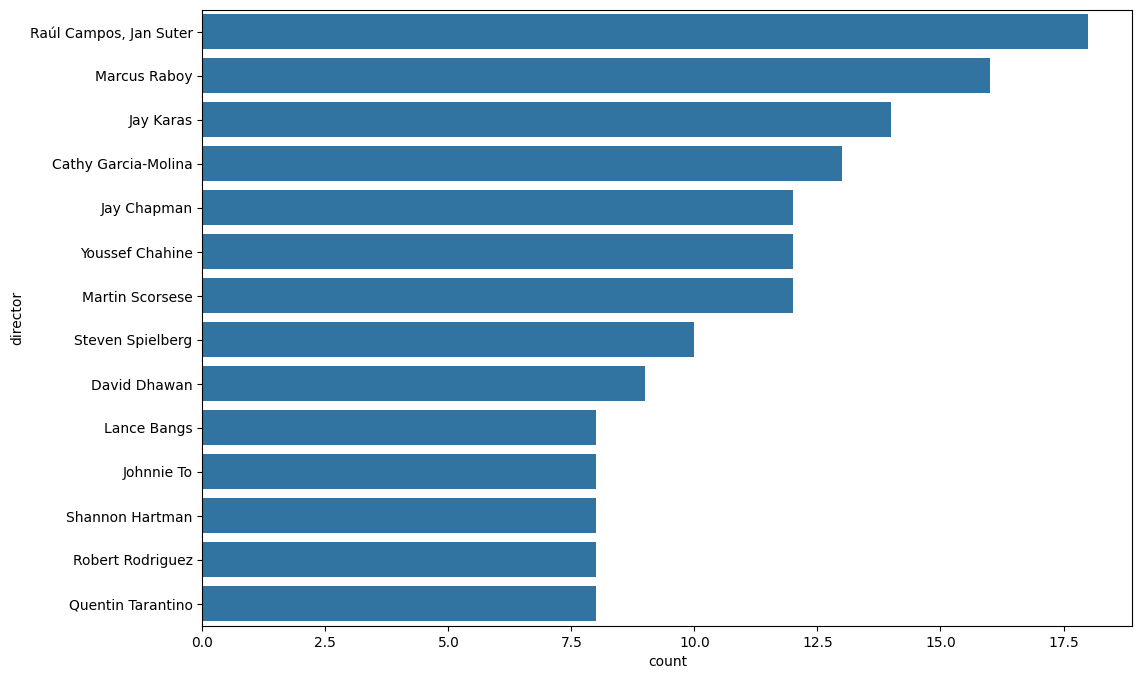

In [81]:
# visualization
plt.figure(figsize=(12,8))
sns.countplot(y=df['director'], data = df, order = df['director'].value_counts().index[1:15])

###Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, etc are the top directors. It would have been easier to get more insights if some of the values in the director column were not null.

### **Titles**

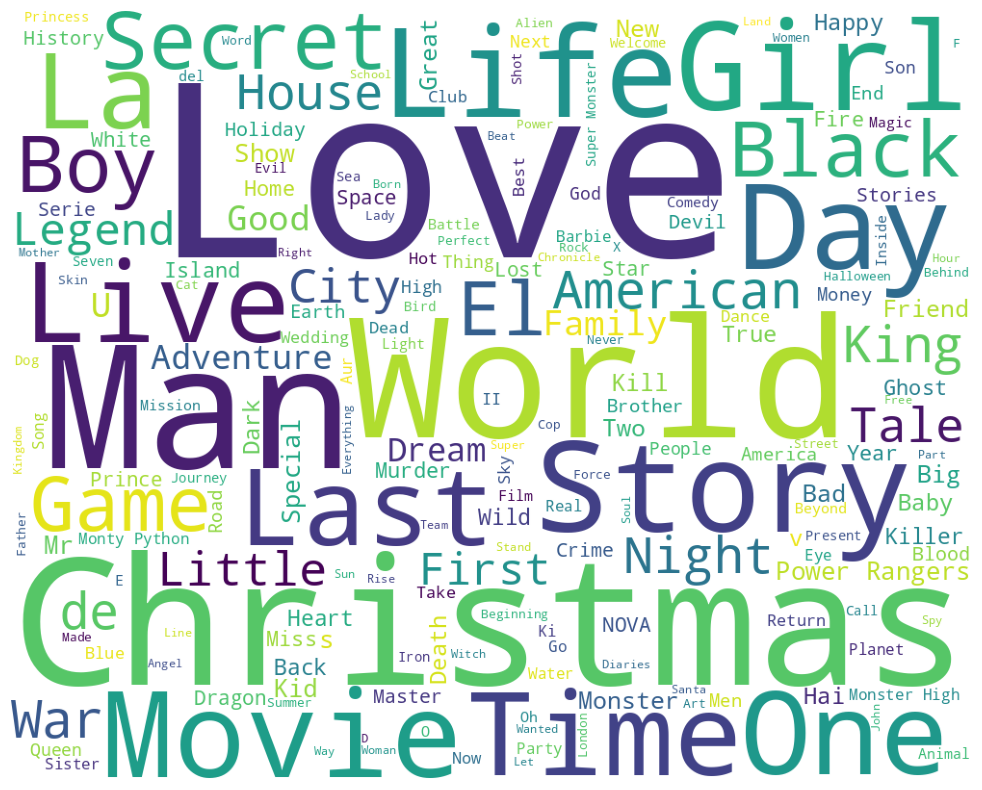

In [82]:
# most frequent words used in titles.
#Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

#Most occurred word in title
plt.subplots(figsize=(20,10))
stopwords = set(STOPWORDS)
text = " ".join(df.title)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=1000,height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Christmas, love, world, story, life, girl, etc are the most frequent words used in the title of the contents.

### **Genres**

In [83]:
# value counts.
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

<Axes: xlabel='count', ylabel='listed_in'>

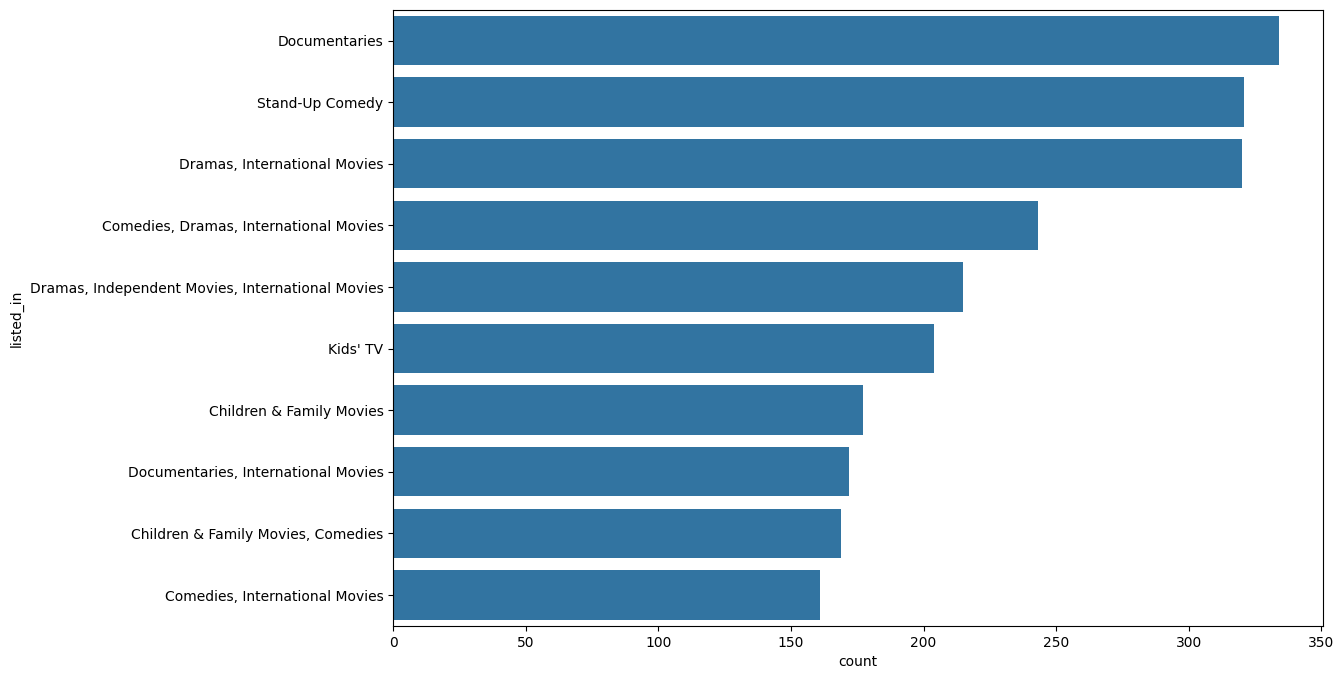

In [84]:
# visualization oftop ten genres.
plt.figure(figsize = (12,8))
sns.countplot(y=df['listed_in'], data=df, order = df['listed_in'].value_counts().index[:10])

### **Top 15 genres.**

In [85]:
# seprating the genres from every content and assigning them to a new genres list.
genres = df['listed_in']
genre_list=[]
for i in genres:
  i=i.split(",")
  for j in i:
    genre_list.append(j)


In [86]:
# converting genre list into dataframe.
gen_df = pd.DataFrame(genre_list)
gen_df.rename(columns={0:'genres'}, inplace = True)
gen_df.value_counts().head(15)

genres                  
 International Movies       2323
Dramas                      1384
Comedies                    1074
Documentaries                751
 Dramas                      722
Action & Adventure           721
International TV Shows       689
 Independent Movies          653
 TV Dramas                   641
 Romantic Movies             528
 International TV Shows      509
Children & Family Movies     502
 Thrillers                   442
 TV Comedies                 409
 Comedies                    397
dtype: int64

<Axes: xlabel='count', ylabel='genres'>

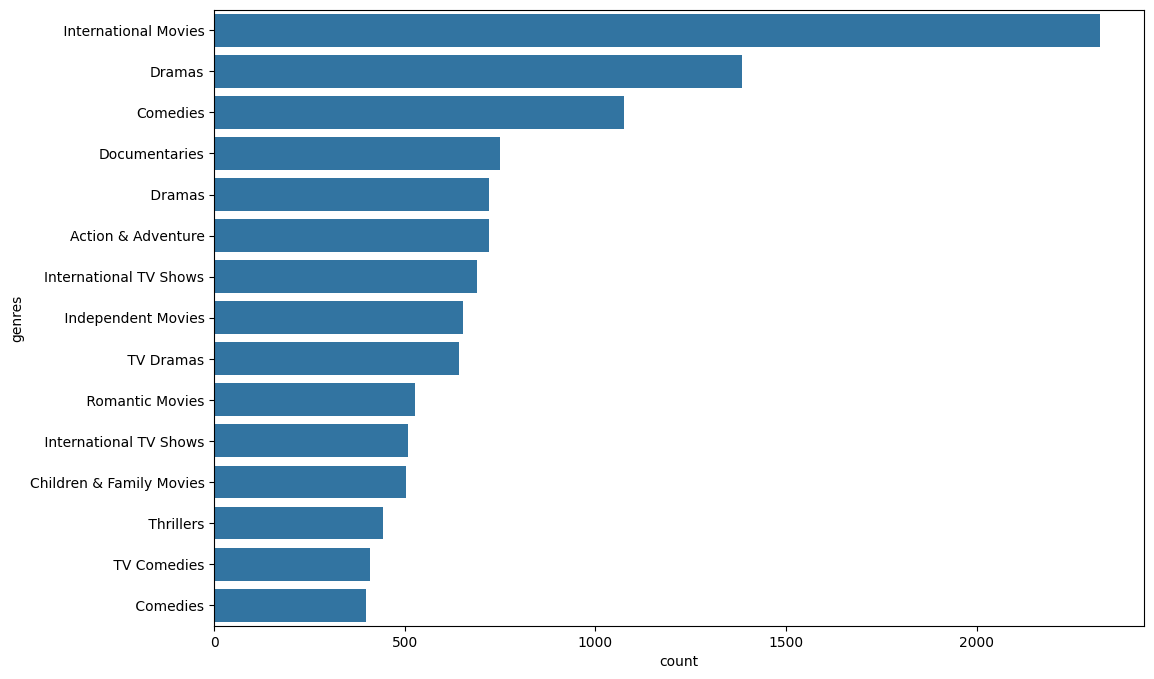

In [87]:
# Visualization of top 15 genres on netflix.
plt.figure(figsize=(12,8))
sns.countplot(y=gen_df['genres'], data=gen_df, order = gen_df['genres'].value_counts().index[:15])

### As we can see in the above-count plot, international movies, dramas, comedies, and action & adventure are some of the top genres.

## **Cast**

In [88]:
# extracting top crew members from cast.
crew_list=[]
for i in df['cast']:
  i=i.split(',')
  for j in i:
    crew_list.append(j)


In [89]:
# converting the list into dataframe
crew_df = pd.DataFrame(crew_list)
crew_df.rename(columns = {0:'actr_actrs'}, inplace = True)
crew_df

,actr_actrs
0,João Miguel
1,Bianca Comparato
2,Michel Gomes
3,Rodolfo Valente
4,Vaneza Oliveira
...,...
56599,Chittaranjan Tripathy
56600,Nasty C
56601,Adriano Zumbo
56602,Rachel Khoo


<Axes: xlabel='count', ylabel='actr_actrs'>

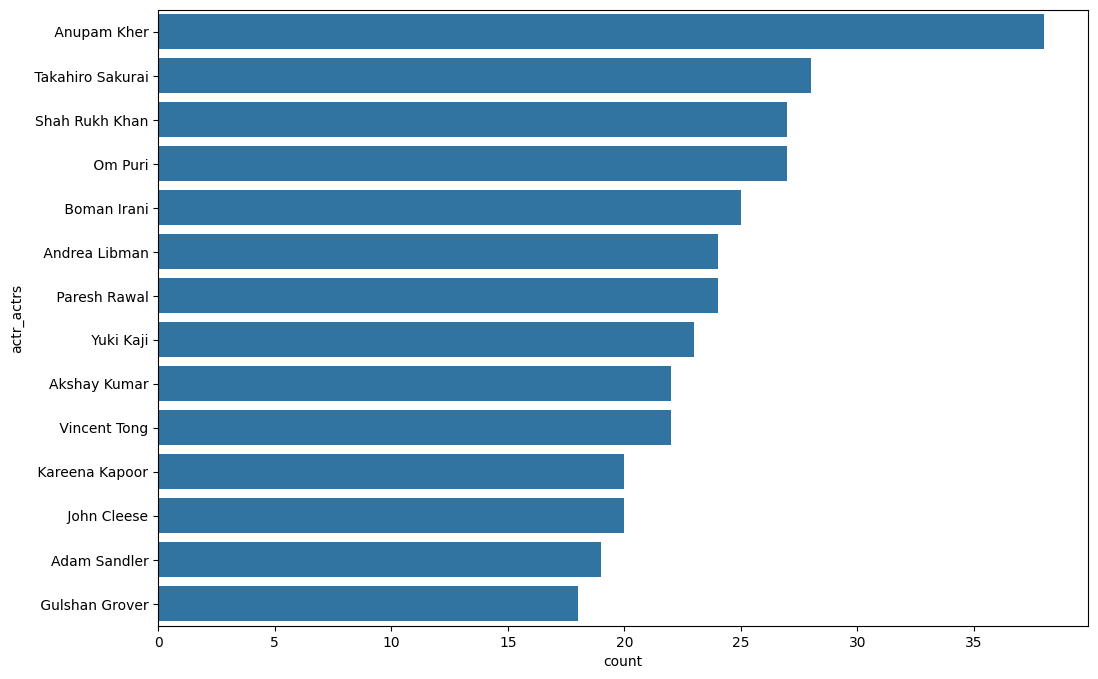

In [90]:
# top 15 actor or actress on netflix.
plt.figure(figsize=(12,8))
sns.countplot(y= crew_df['actr_actrs'], data = crew_df, order = crew_df['actr_actrs'].value_counts().index[1:15])

### Anupam Kher, Takahiro Sakurai, Shah Rukh Khan, Boman Irani, etc are some of the top actors on Netflix. I had also some null values present in the cast column. It would have been easier to get more insights if some of the values in the cast column were not null.

### **Movies Duration**

In [91]:
# separating the movies data from type column.
movie_df = df[df['type']=='Movie']['duration'].apply(lambda x: x.split(" ")[0]).reset_index()
movie_df

,index,duration
0,1,93
1,2,78
2,3,80
3,4,123
4,6,95
...,...,...
5372,7781,88
5373,7782,99
5374,7783,111
5375,7784,44


<Axes: xlabel='duration', ylabel='Density'>

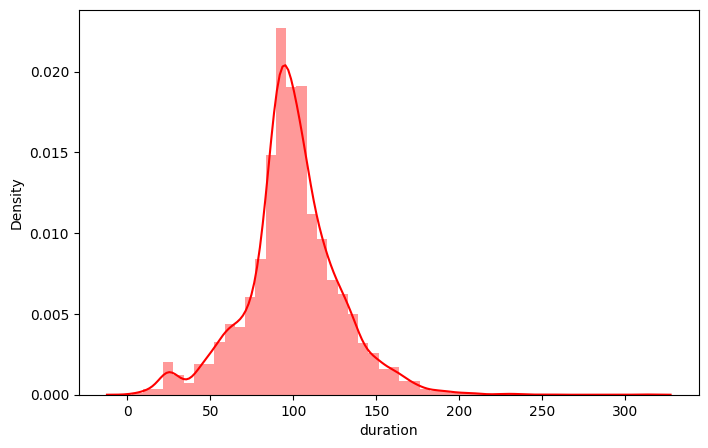

In [92]:
# Visualization of movies duration distribution.
plt.figure(figsize=(8,5))
sns.distplot(movie_df['duration'], color = 'red')

### The range duration of the movies on Netflix is between 50 to 150 minutes. There are also some movies of 300 minutes.

### **TV Shows Duration**

In [93]:
# tv show df.
tv_df = df[df['type']=='TV Show']
tv_df['duration'].value_counts()
# df.loc[df['type']=='TV Show']['duration'].value_counts()

1 Season      1608
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: duration, dtype: int64

<Axes: xlabel='count', ylabel='duration'>

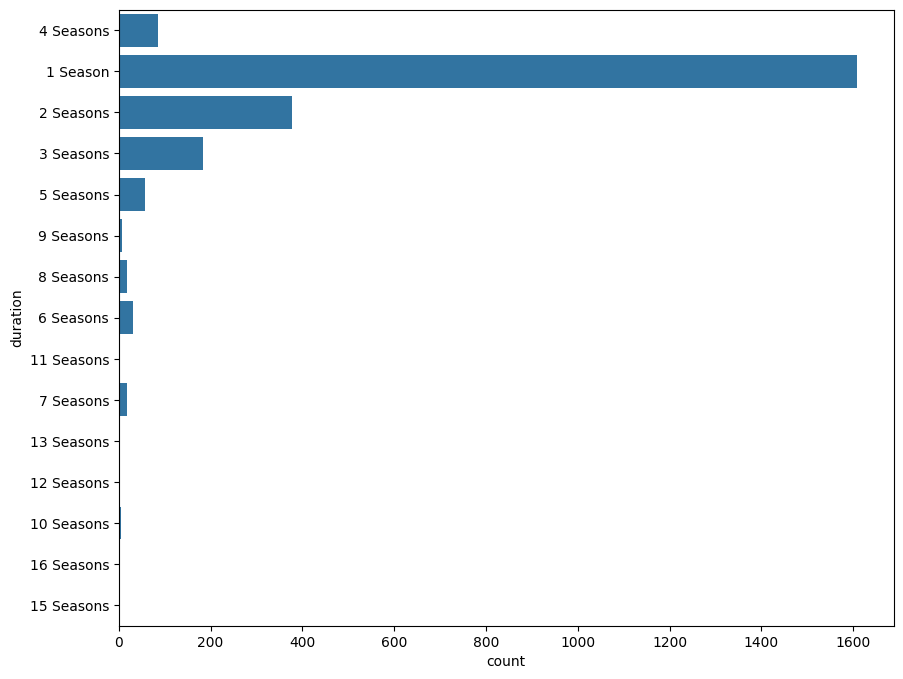

In [94]:
# visualization of tv show duration.
plt.figure(figsize=(10,8))
sns.countplot(y = tv_df['duration'])

### Most TV Shows has only 1 or 2 seasons. There are only few TV Shows with more than 2 seasons.

### **counts wrt type of the content**

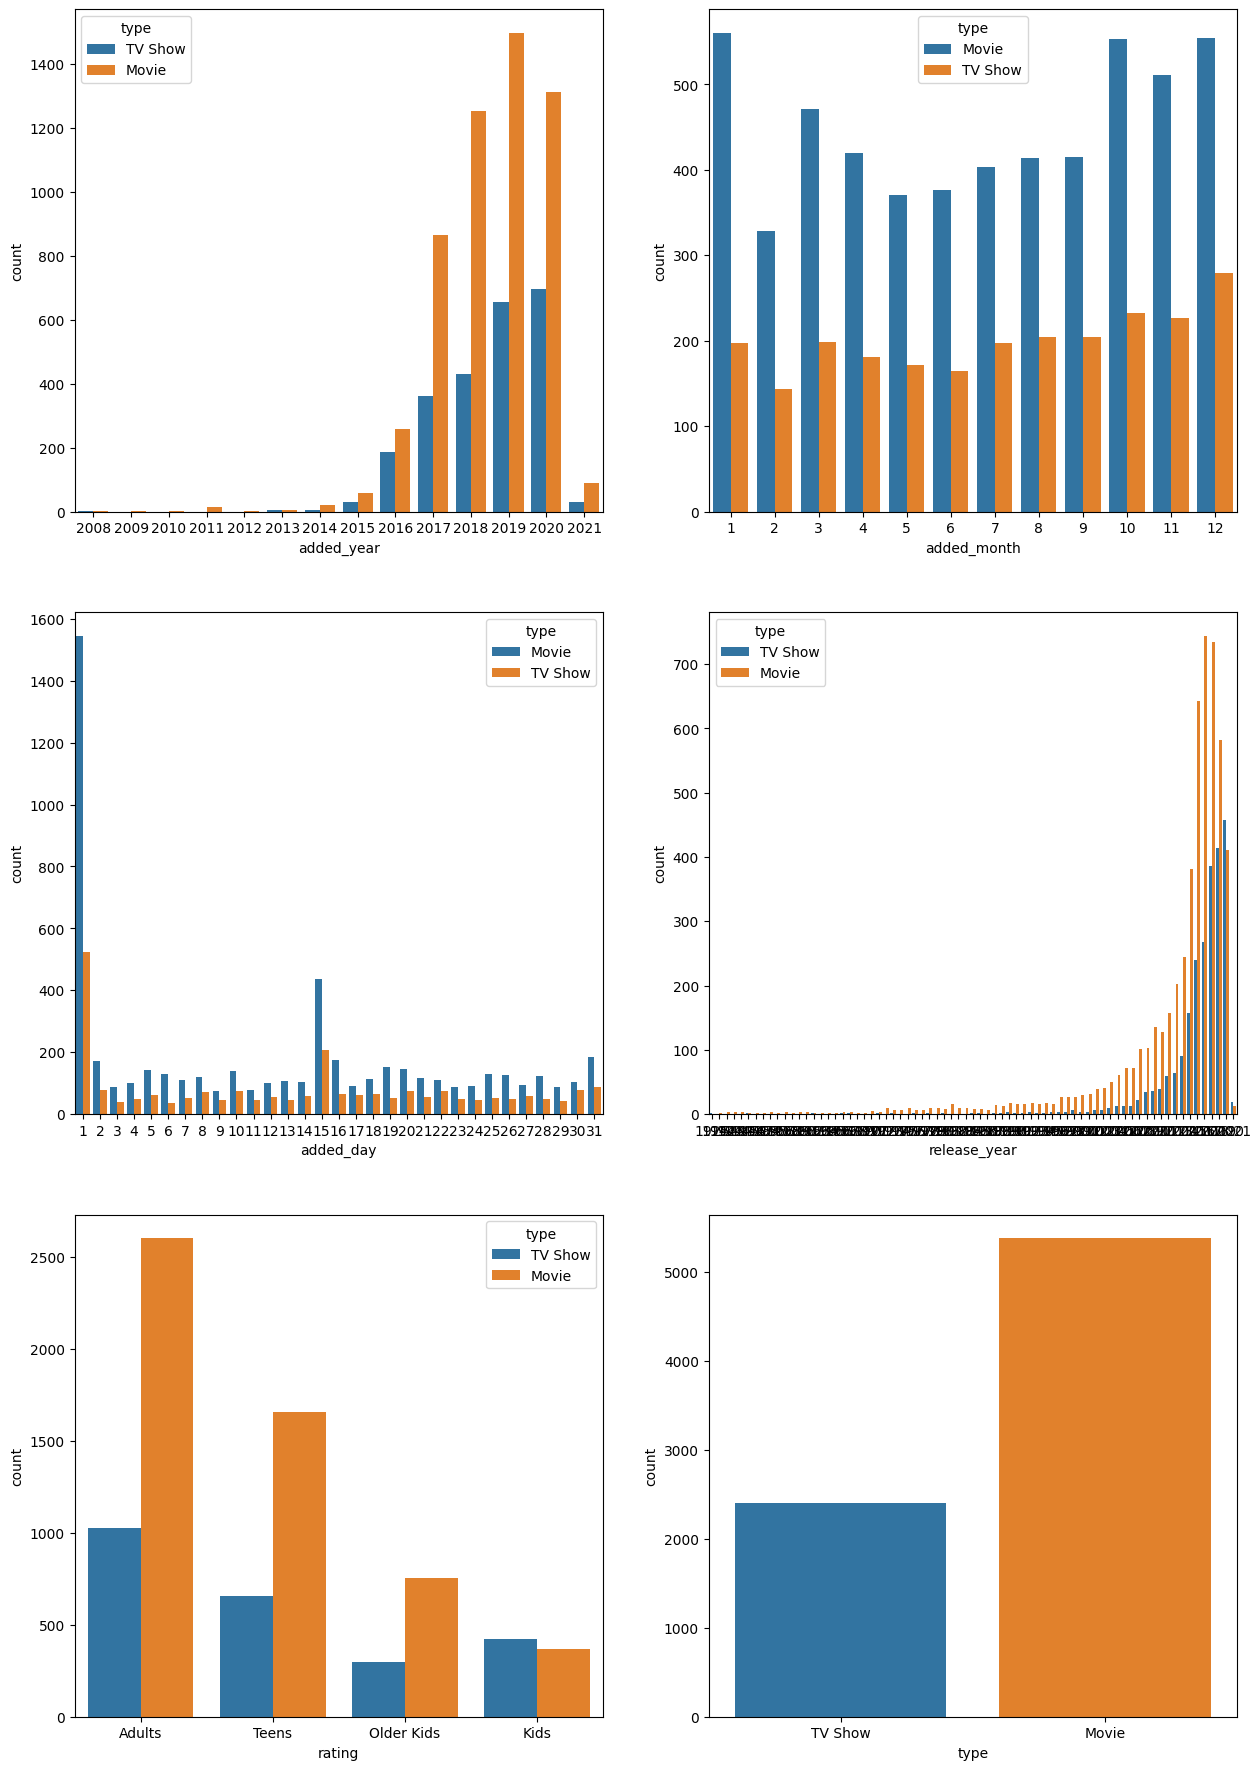

In [95]:
# counts wrt type of the content.
plt.figure(figsize=(15,30))
for i in enumerate(var):
  plt.subplot(4, 2, i[0]+1)
  sns.countplot(x = i[1], hue = 'type', data = df)

### **Insights Found.**

* ### Netflix has been increasingly focusing on TV Shows rather than movies in recent years.

* ### Most of the content on Netflix are added in the month of December and January. In Which movies are added the most.

* ### Maximum contents are added on the first day of the month.

* ### Adding the number of content on Netflix is increased in recent years.

* ### Most of the movies and tv shows are for adults. Very few contents are for kids.

### **type content available in different countries.**

<Axes: xlabel='country', ylabel='count'>

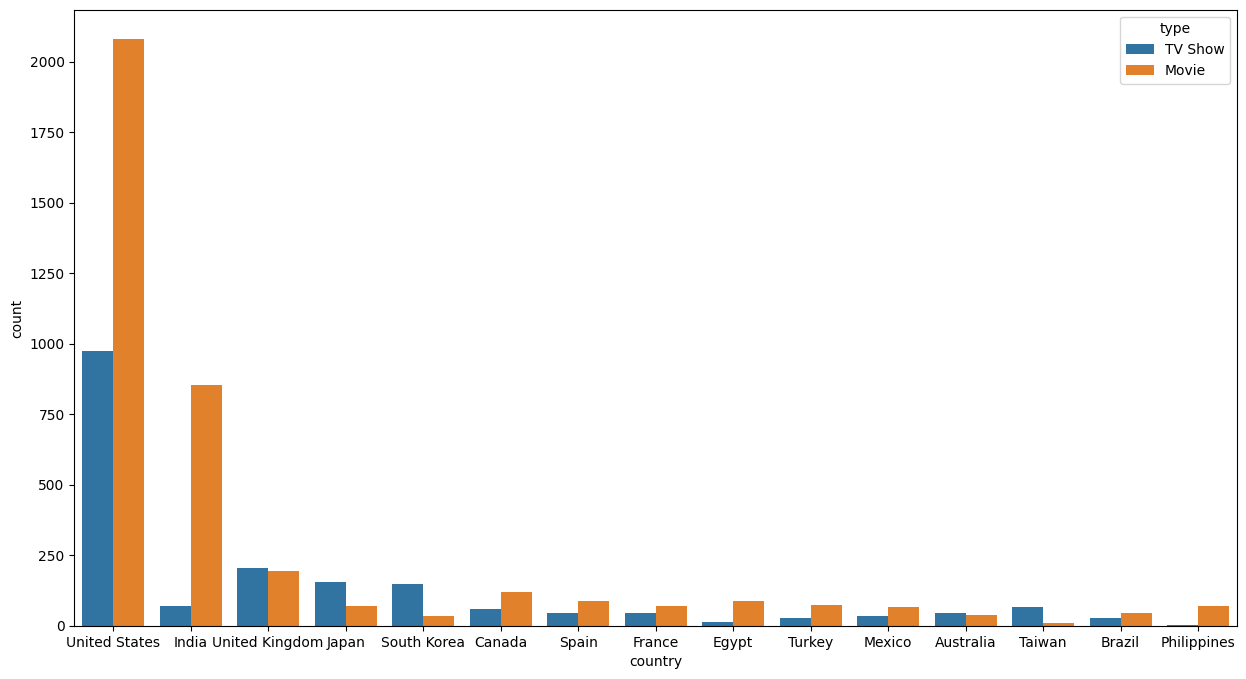

In [96]:
# total production of country wrt type of the content.
plt.figure(figsize=(15,8))
sns.countplot(x = df['country'], hue='type', data = df, order = df['country'].value_counts().index[:15])

### US has the most number of movies and tv shows type content. While India comes in second place for movies on Netflix. But UK comes in second place in terms of tv shows. Followed by South Korea and Canada. Other countries have a very less number of contents added on Netflix.

## **Feature Engineering**

### There are no outliers in the data so I don't have to handle any outliers here. While I cleaned the data completely in the data wrangling section. Like handled the null values, converted the ratings into an understandable format, and extracted the date data from date_added column.

### **Textual Data Preprocessing**

In [97]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_day', 'added_month', 'added_year'],
      dtype='object')

In [98]:
# combinig the textual data to proceed with NLP
df['text'] = df['cast']+df['listed_in']+df['rating']+df['description']+df['director']+df['rating']+df['country']
df['text'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyAdultsIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.name absentAdultsBrazil'

### Function to remove punctuation and stopwords.

In [99]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [100]:
# applying function to remove punctuation.
df['text']=df['text'].apply(remove_punctuation)
df['text'][0]

'João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiInternational TV Shows TV Dramas TV SciFi  FantasyAdultsIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalorname absentAdultsBrazil'

## **Removing stopwords**

In [101]:
# downloading stop words.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [102]:
# assigning the stopwords to a variable
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [103]:
# function to remove stopwords from a given text
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [104]:
# applying the function on text data.
df['text'] = df['text'].apply(remove_stopwords)
df['text'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschiinternational tv shows tv dramas tv scifi fantasyadultsin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorname absentadultsbrazil'

##  **Stemming operations**

### Text Normalization

In [105]:
# function for stemming and lemmatization.
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [106]:
# applying the function on text data.
df['text'] = df['text'].apply(stemming)
df['text'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschiintern tv show tv drama tv scifi fantasyadultsin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalornam absentadultsbrazil'

In [107]:
# tfidf object initialization
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fitting the vectorizer using the text data
tfidf.fit(df['text'])

# collecting the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [108]:
# converting vector into array form for clustering
X = tfidf.transform(df['text']).toarray()

# summarize encoded vector
print(X)
print(f'shape of the vector : {X.shape}')
print(f'datatype : {type(X)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


## **Applying PCA to reduce dimension**

In [109]:
# initializing instance of PCA.
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

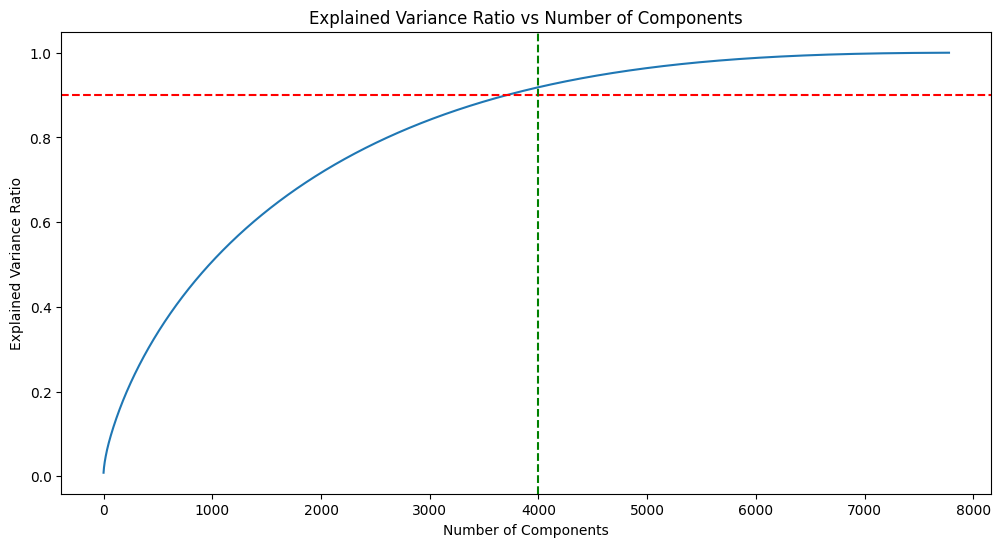

In [110]:
# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.axhline(y= 0.9, color='red', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.show()

### As I can see clearly in the above graph that the data with 4000 components cover 90 percent variation. If we have approximately 7000 components then it will capture 100% variance but that will increase the model complexity. So with this information, i'm going to reduce the dimension.

In [111]:
X.shape

(7777, 10000)

In [112]:
# reducinmg the dimension to 4000.
pca = PCA(n_components = 4000, random_state = 42)
pca.fit(X)
transformed_data = pca.fit_transform(X)
transformed_data.shape

(7777, 4000)

In [113]:
# copy of the transformed data.
net_data = transformed_data.copy()

# **ML Model**

## **K-Means Clustering**

###**Elbow Method**

In [114]:
# finding the k value through elbow method.
k_value = range(2,12)
ssd_value = []
for k in k_value:
  kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
  kmeans.fit(net_data)
  ssd_value.append(kmeans.inertia_)

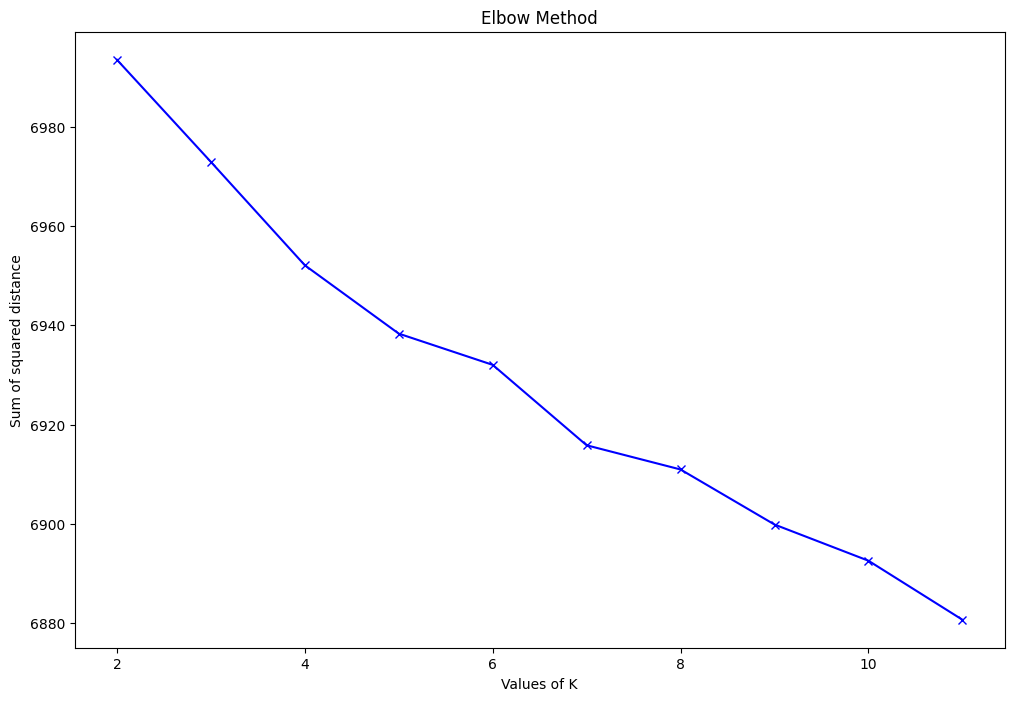

In [115]:
# plotting the elbow curve.
plt.figure(figsize=(12,8))
plt.plot(k_value, ssd_value, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method')
plt.show()

### Here i can see a sudden stipness after 6 clusters. After 6 cluster value, the within-cluster sum of squares (WSS) starts to decrease at a slower rate. So according to elbow curve the optimal value for k is 6. Let's see the silhoutte score.

### **Silhoutte Score**

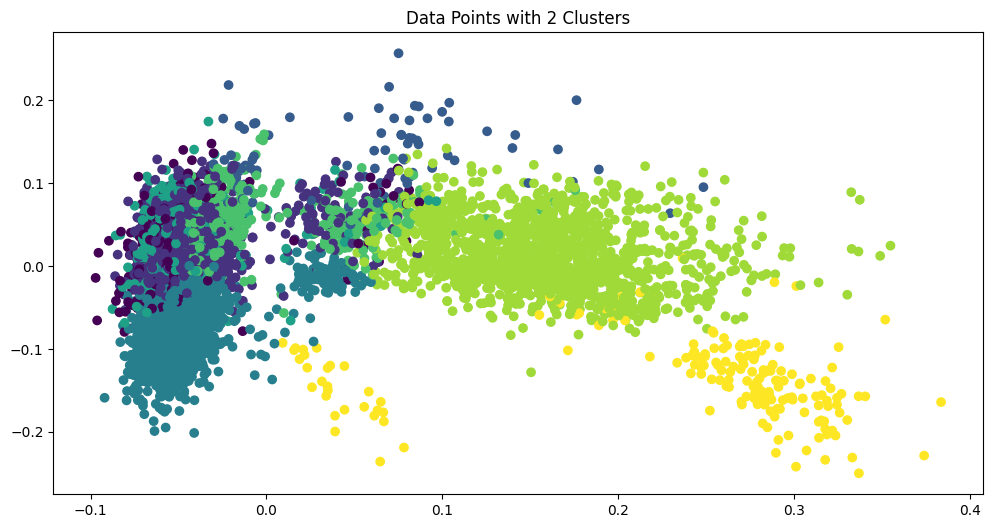

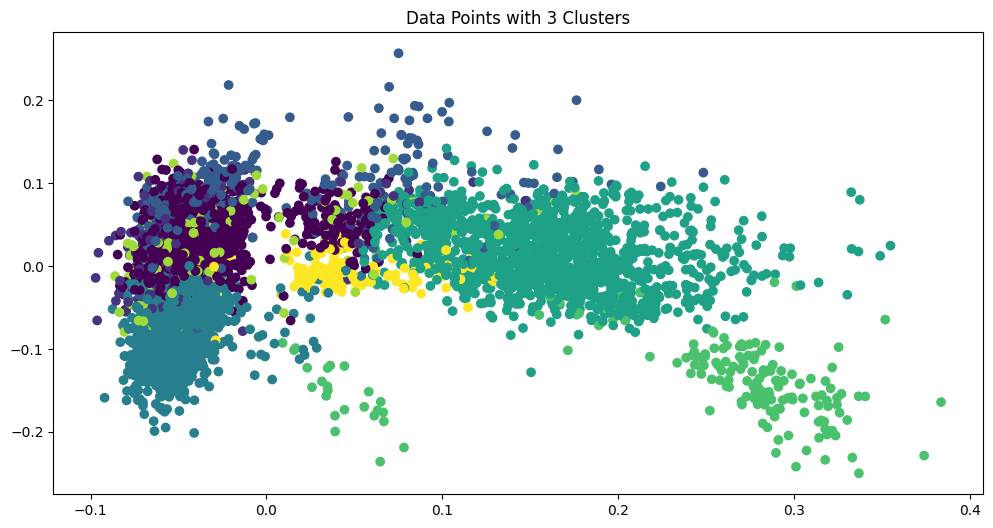

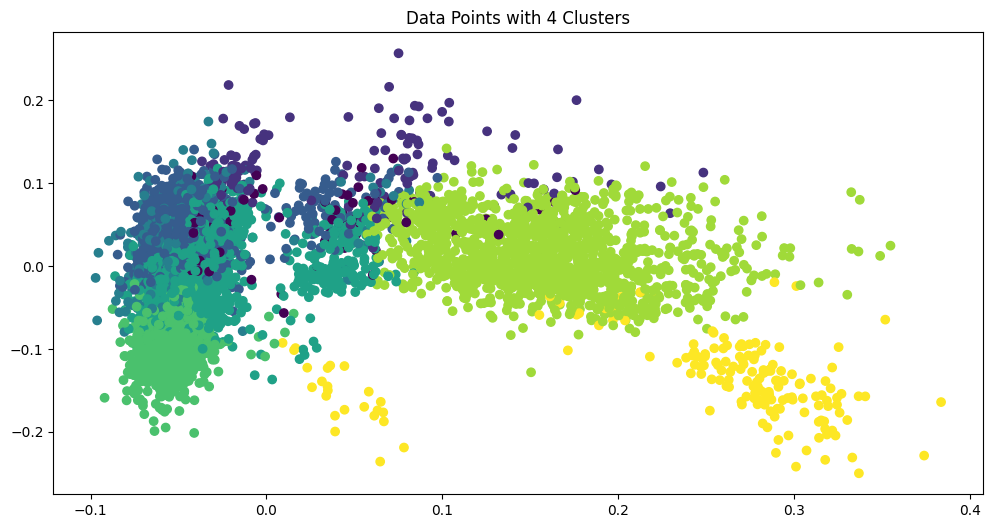

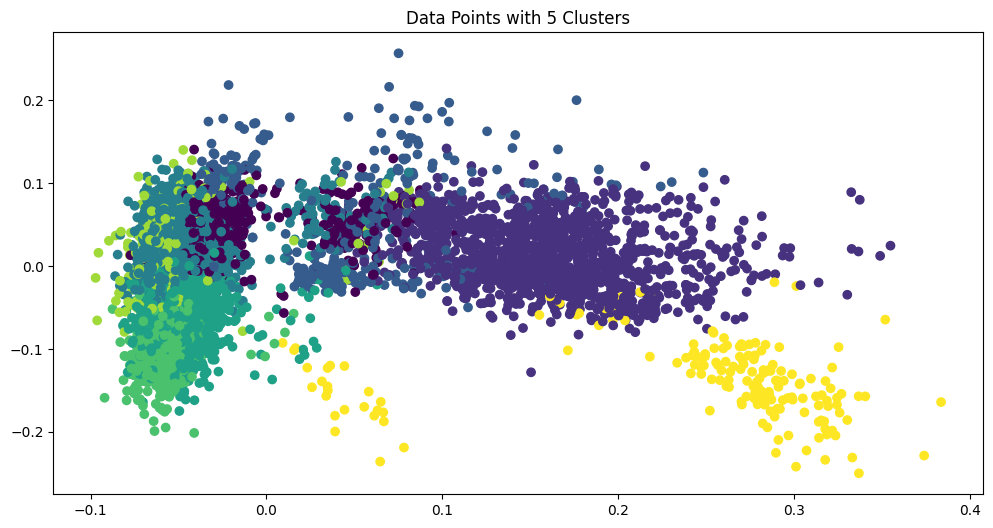

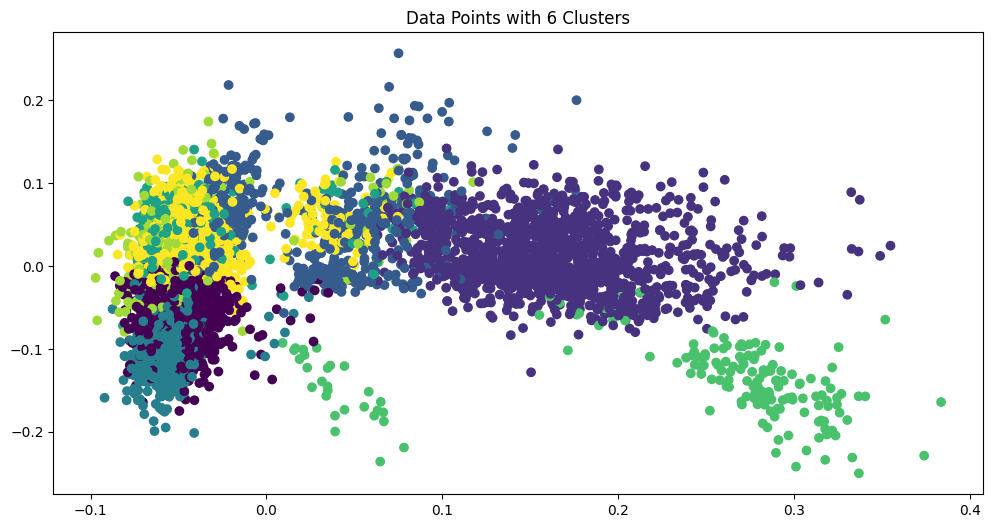

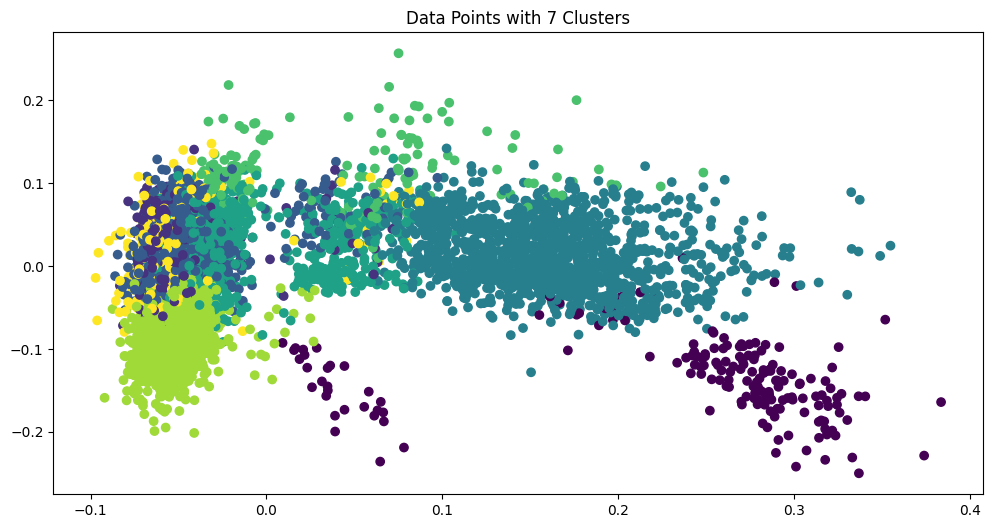

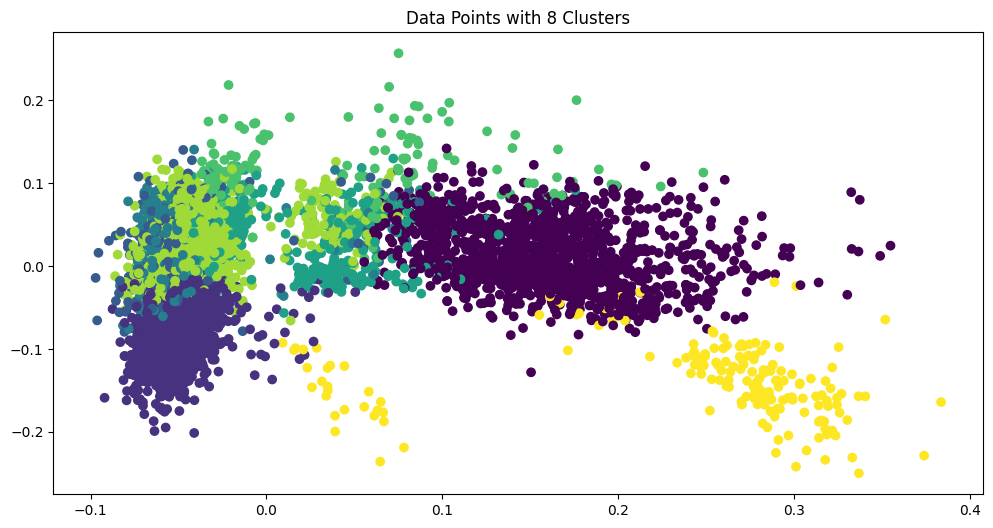

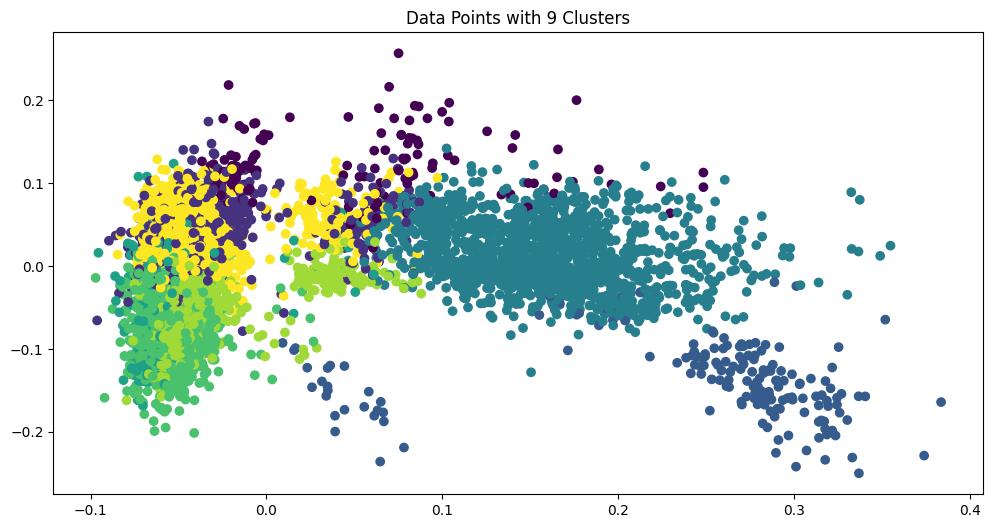

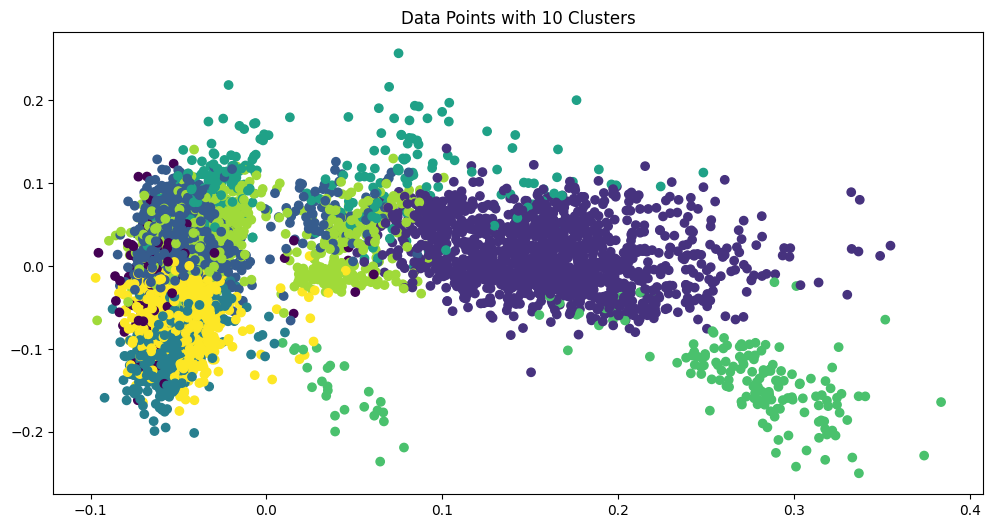

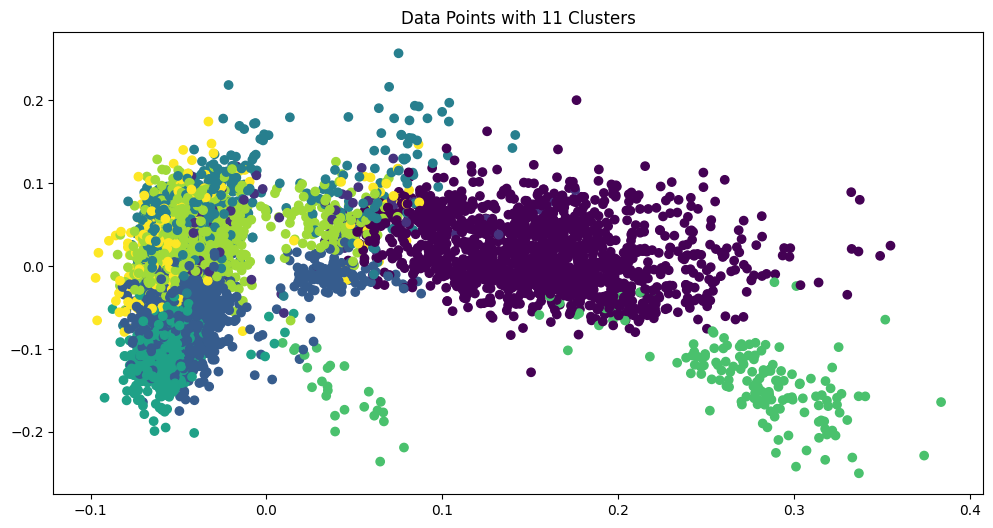

In [116]:
# range for k values.
n_cluster_range = range(2,12)

# empty list to store silhouette score and cluster lables
silhouette_avg_score = []
cluster_label_list = []

# running a loop to find the score with optimal k value.
for k in n_cluster_range:

  # initializing the instance
  kmeans = KMeans()

  # predicting the cluster lables
  cluster_labels = kmeans.fit_predict(net_data)

  # cluster centres.
  centroids = kmeans.cluster_centers_

  # storing the cluster lables in cluster lable list
  cluster_label_list.append(cluster_labels)

  # finding silhouette score and storing them into silhouette average score list.
  silhouette_avg = silhouette_score(net_data, cluster_labels)
  silhouette_avg_score.append(silhouette_avg)

  # Plotting the data points with cluster labels
  plt.figure(figsize = (12,6))
  plt.scatter(net_data[:, 0], net_data[:, 1], c=cluster_labels)
  plt.title(f'Data Points with {k} Clusters')
  plt.show()


### As we can see here the data points with 6 clusters are good enough. It would be more clear with silhouette score visualization.

### **Visualization of silhouette score with different value of k.**

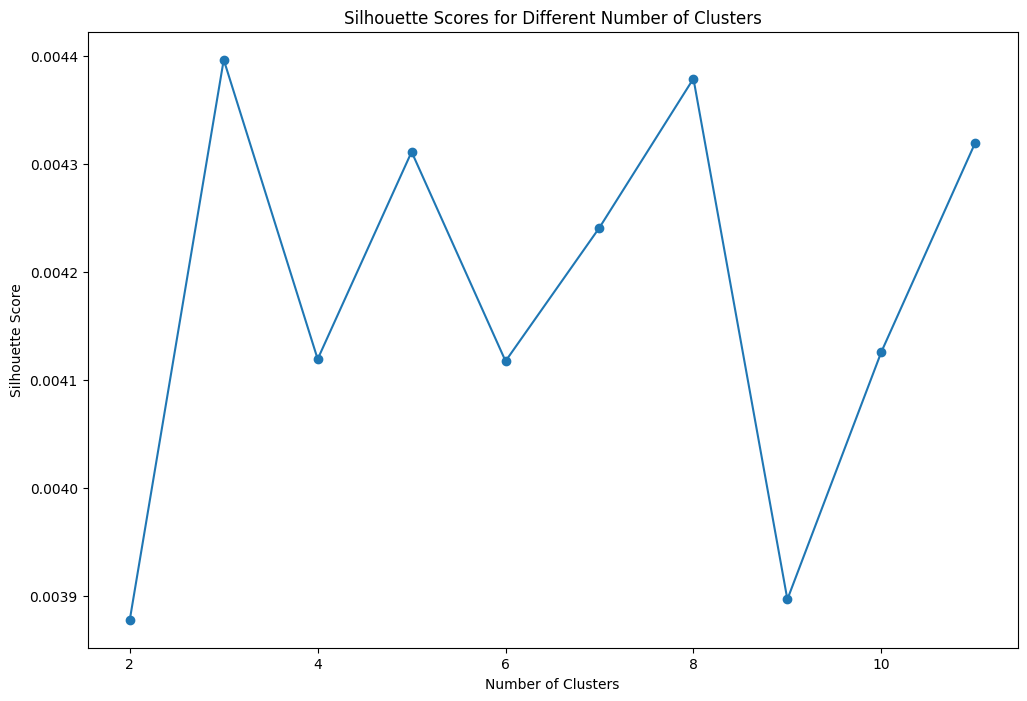

In [117]:
# Plotting the silhouette scores as a function of number of clusters
plt.figure(figsize=(12,8))
plt.plot(n_cluster_range, silhouette_avg_score, marker='o')

# Add labels to the plot
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')

# Show the plot
plt.show()

### According to the above line plot, with 6 clusters we get a good score. Which is really good as compared to different number of clusters.

### **Final KMeans model.**

In [118]:
# final model.
kmeans= KMeans(n_clusters=6, max_iter=10000, tol = 1e-4, n_init = 1, random_state= 42)
kmeans.fit(net_data)
label = kmeans.fit_predict(net_data)

In [119]:
# model evaluation.
score = silhouette_score(net_data, label)
print("Silhouette score is {}".format(score))

Silhouette score is 0.0053842488181997375


In [120]:
# creating a new column as cluster with cluster number5s.
df['cluster'] = kmeans.labels_

In [121]:
# first five rows.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_day,added_month,added_year,text,cluster
0,s1,TV Show,3%,name absent,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,joão miguel bianca comparato michel gome rodol...,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,demián bichir héctor bonilla oscar serrano aza...,5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,tedd chan stella chung henley hii lawrenc koh ...,5
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,elijah wood john c reilli jennif connelli chri...,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,jim sturgess kevin spacey kate bosworth aaron ...,0


In [122]:
# value count of different clusters.
df['cluster'].value_counts()

5    2069
0    1941
4    1370
2    1244
1     738
3     415
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

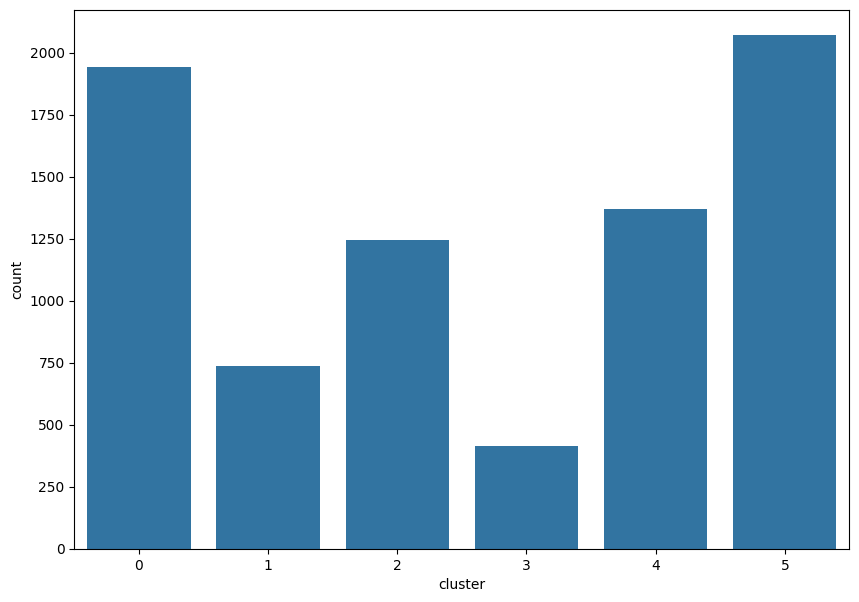

In [123]:
# Size of clusters formed
plt.figure(figsize=(10,7))
sns.countplot(x =df['cluster'], data = df)

### Cluster 5 and 0 has got the maximum number of data points while cluster 1 and 3 has got less than 1000 data points. Cluster 2 has approximately 1200 data points.

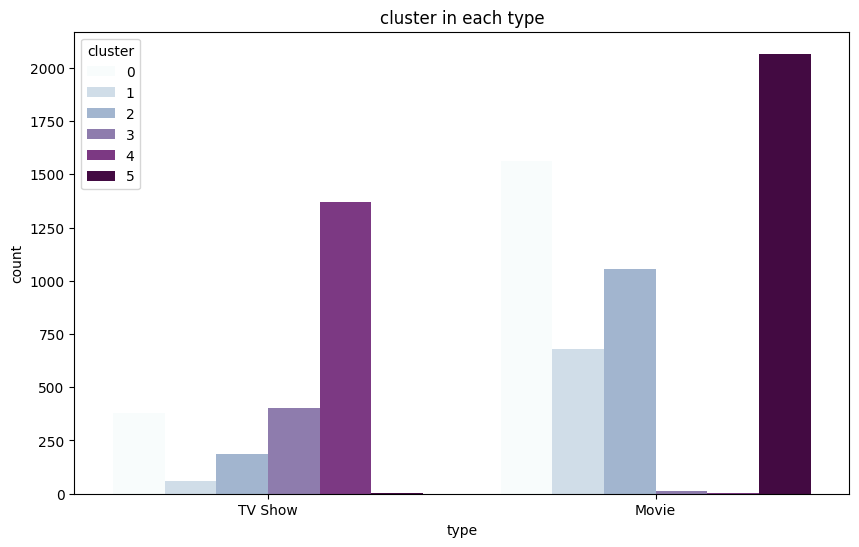

In [124]:
# plotting for cluster in each type
plt.figure(figsize=(10,6))
sns.countplot(x=df['type'],palette="BuPu",hue=df['cluster'])
plt.title("cluster in each type")
plt.show()


### Maximum content in all the cluster labels are movies.

### **Dendogram**

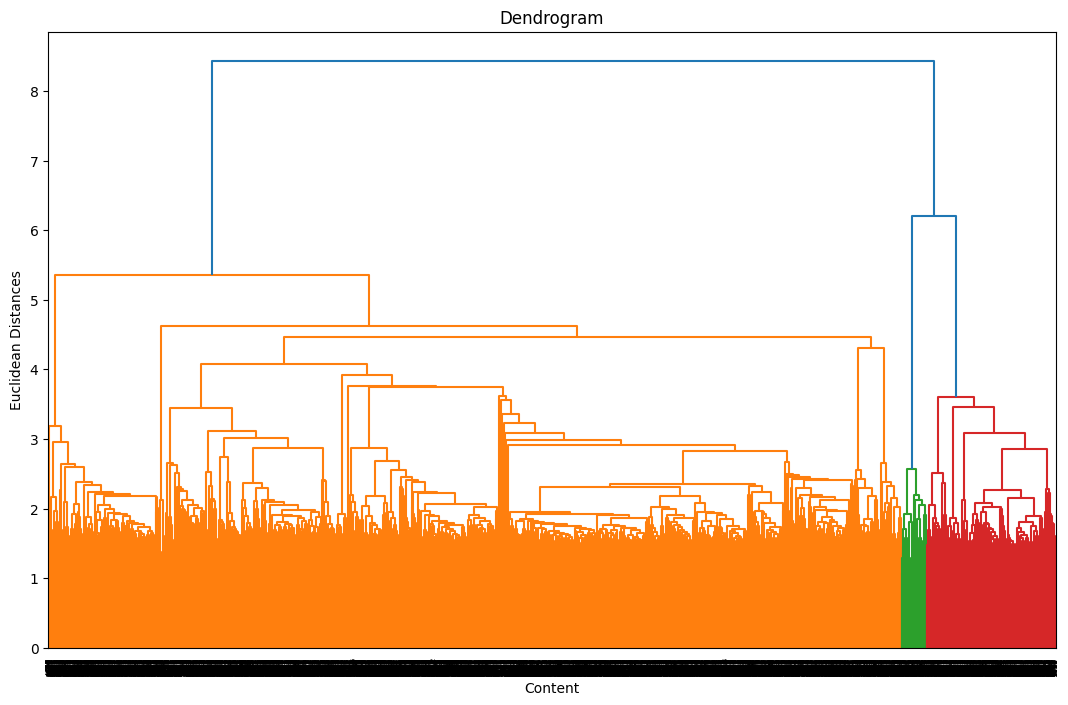

In [125]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(net_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

### As per the dendrogram if we cut the tallest vertical line which shows the distance between those clusters, we'll get 4 clusters with 5 euclidean distance.

## **Hierarchical Clustering**

**Agglomerative Clustering**

In [126]:
# Fitting hierarchical clustering.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(net_data)

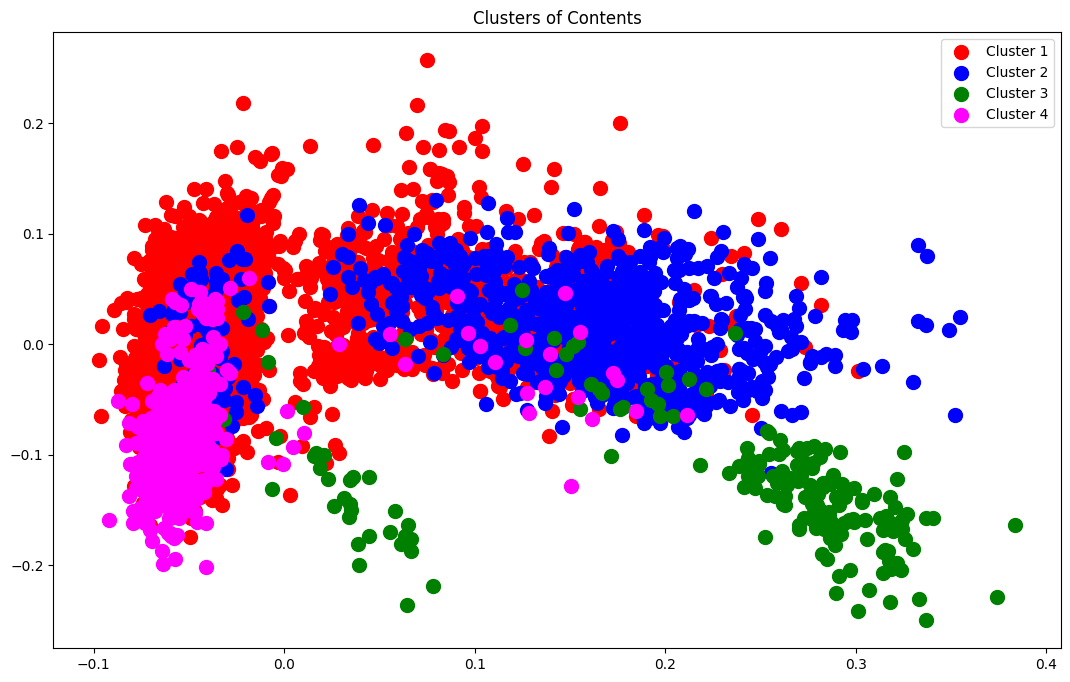

In [127]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(net_data[y_hc == 0, 0], net_data[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(net_data[y_hc == 1, 0], net_data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(net_data[y_hc == 2, 0], net_data[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(net_data[y_hc == 3, 0], net_data[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Contents')

plt.legend()
plt.show()

In [128]:
# count of each cluster.
np.unique(y_hc,return_counts=True)

(array([0, 1, 2, 3]), array([5746,  992,  192,  847]))

### Nearly 6000 data points belong to cluster label 0, 992 belongs to 1, 847 belongs to label 3 and, only 192 belongs to cluster label 2.

# **Conclusion**

### Majority of the content on Netflix is movies, but in recent years it has been focusing more on Tv-Shows.

### Most of the contents are for adults, while very few contents are for teens and kids. On the other side, most of the contents are added in the month of December and January. If I talk about the day, then a majority of the contents are added on the first day of the month followed by the first day of the third week of the month.

### Majority of the features have textual value so I applied NLP to that for preprocessing the data. After that, the dimension increased to 10000. So I applied PCA for dimensionality reduction, and I ended up with 4000 features.

### I implemented two models kmeans and agglomerative  clustering. In kmeans I got  6 cluster value with the elbow method and silhouette score. So finally I chose 6 number of clusters as my optimal k value. At last through dendrogram i found the optimal value for k is 4. So i ended up doing agglomerative clustering with four clusters.